In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [79]:
def set_plot_params(title, ylabel):
    plt.title(title)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Date", fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=30, fontsize=12)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))


def calculate_ylim(data):
    ylim_min = min(data) - (max(data) - min(data)) * 0.1
    ylim_max = max(data) + (max(data) - min(data)) * 0.1
    return ylim_min, ylim_max


def draw_graph(data: pd.DataFrame, title: str, ylabel: str, date_lst: list, color="blue"):
    '''
    :param data: 시간 인덱스와 그래프로 표시할 정보가 있는 데이터프레임
    :param title: 그래프 제목
    :param ylabel: 그래프 y축 단위
    :param date_lst: 아웃라이어 날짜인덱스 리스트
    :param color: 그래프 색깔
    :return: 
    '''
    plt.figure(figsize=(18, 3), dpi=400)
    plt.plot(data.index, data.values, color=color, linestyle='--')
    for date in date_lst:
        plt.axvline(pd.to_datetime(date), color='red', linewidth=0.8, linestyle='--', label='Highlight Date')
    set_plot_params(title, ylabel)
    ylim_min, ylim_max = calculate_ylim(list(data.values))
    plt.ylim(ylim_min, ylim_max)
    plt.show()

In [80]:
def compute_CUSUM(X):
    CUSUM = np.cumsum(X ** 2)
    return CUSUM


def compute_gamma(X, T, m):
    mean_X = np.mean(X)
    r = X - mean_X  # 잔차 계산
    r_squared = r ** 2
    sigma_squared = np.mean(r_squared)

    gamma = np.zeros(m + 1)
    for i in range(0, m + 1):
        gamma_i = np.sum((r_squared[i:T] - sigma_squared) * (r_squared[0:T - i] - sigma_squared))
        gamma[i] = gamma_i / T
    return gamma


def compute_lambda(gamma, m):
    lambda_hat = gamma[0] + 2 * np.sum((1 - np.arange(1, m + 1) / (m + 1)) * gamma[1:m + 1])
    return lambda_hat


def compute_D_prime(CUSUM, T, lambda_hat):
    k = np.arange(T)
    D_prime = (CUSUM - (k + 1) / T * CUSUM[-1]) / np.sqrt(lambda_hat)
    return D_prime


def compute_percentile(D_prime, T, percent=99):
    D_prime_abs = np.abs(D_prime) * np.sqrt(T / 2)
    critical_value = np.percentile(D_prime_abs, percent)
    return critical_value

In [164]:
info_wo_tle_df = pd.read_csv('Database/58400.csv')

In [165]:
name = 'perigee'
df = info_wo_tle_df[['year', 'month', 'day', 'hour', 'minute', name]]

In [91]:
col_name = 'perigee'
hour_df = info_wo_tle_df[::60].copy()
value = hour_df[col_name].values
diff_value = np.log(hour_df[col_name]).diff().fillna(0).values

In [92]:
info_df = pd.read_csv('Database/58400.csv')
info_wo_tle_df = info_df.drop(['tle1', 'tle2'], axis=1).copy()
info_wo_tle_df['time'] = info_wo_tle_df['year'].astype(str) + '-' + info_wo_tle_df['month'].astype(str) + '-' + \
                         info_wo_tle_df['day'].astype(str) + ' ' + info_wo_tle_df['hour'].astype(str) + ':' + \
                         info_wo_tle_df['minute'].astype(str) + ':' + '00'
info_wo_tle_df['time'] = pd.to_datetime(info_wo_tle_df['time'])
info_wo_tle_df.set_index('time', inplace=True)
info_wo_tle_df.drop(['year', 'month', 'day', 'hour', 'minute'], axis=1, inplace=True)
info_wo_tle_df.index.name = None

hour_df = info_wo_tle_df[::60].copy()
hour_df['change'] = (hour_df['change'].diff().fillna(1) >= 1) * 1

col_name = 'perigee'

value = hour_df[col_name].values
diff_value = np.log(hour_df[col_name]).diff().fillna(0).values

In [166]:
df_1 = df.copy()
df_1.loc[:, 'datetime'] = pd.to_datetime(df_1[['year', 'month', 'day', 'hour', 'minute']])
df_1.set_index('datetime', inplace=True)
df_1.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)
df_1 = df_1.resample('h').max()
# df_1 = df_1.rolling(window=128).mean().dropna()

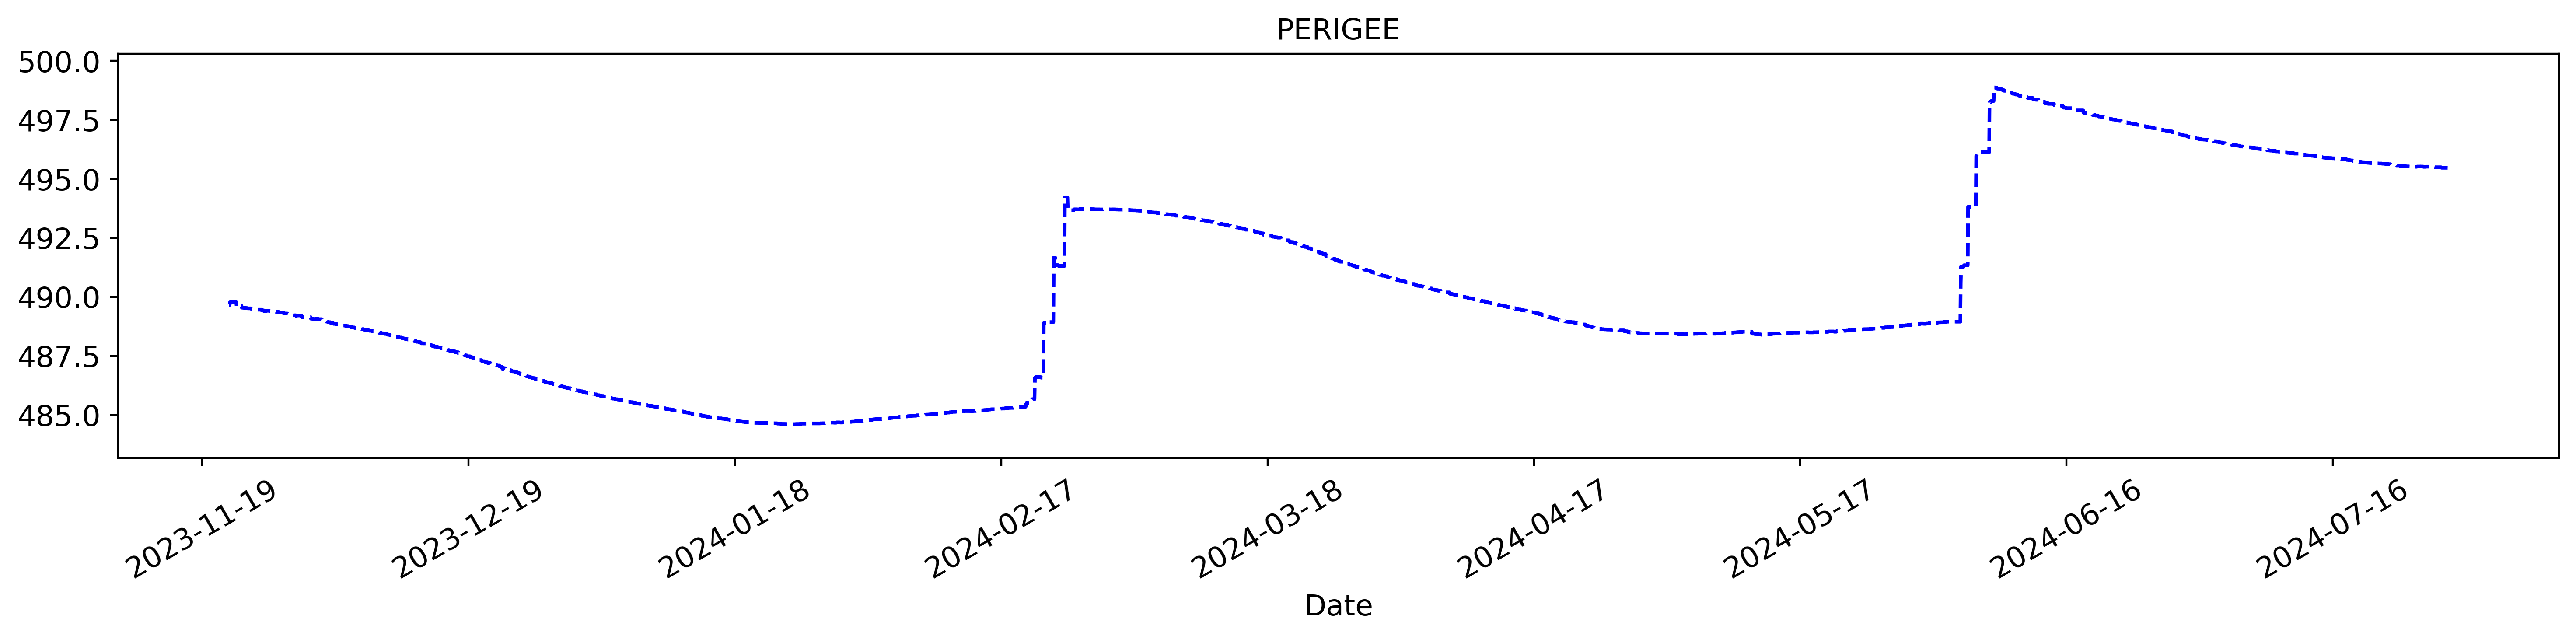

In [158]:
draw_graph(df_1, name.upper(), '',
           pd.DataFrame(df_1.iloc[[]].index.date).drop_duplicates().values.tolist(), 'blue')

In [ ]:
col_name = 'perigee'

value = hour_df[col_name].values
diff_value = np.log(hour_df[col_name]).diff().fillna(0).values

In [167]:
# df_1 = df_1.rolling(window=120).mean().dropna()
df_2 = np.log(df_1).diff().fillna(0).values

df_3 = np.log(df_1).diff().diff().fillna(0).values

In [143]:
diff_value

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -6.08411556e-06,  0.00000000e+00, -9.74591318e-07])

In [168]:
df_2

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       ...,
       [ 0.00000000e+00],
       [-6.08411556e-06],
       [-9.74591318e-07]])

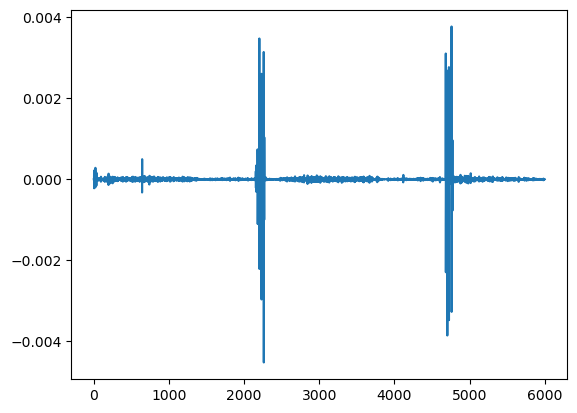

In [48]:
plt.plot(df_3)

In [22]:
# from statsmodels.tsa.stattools import kpss
# from statsmodels.tsa.stattools import adfuller
# 
# result = adfuller(df_2)
# print('ADF')
# print(f'Statistics: {result[0]}')
# print(f'p-value: {result[1]}')
# print(f'Critical values: {result[4]}')
# print('---' * 40)
# 
# result = kpss(df_2)
# print('KPSS')
# print(f'Statistics: {result[0]}')
# print(f'p-value: {result[1]}')
# print(f'Critical values: {result[3]}')
# print('---' * 40)

In [49]:
# 168, 336, 720
window_size = 672
lambda_lst = []
cv_lst = []
current_lst = []
ol_lst2 = []
# df_2=diff_value
for i in tqdm(range(window_size, len(df_2) + 1, 1)):
    X = df_2[i - window_size:i]

    remove_indices = []
    if ol_lst2:
        for j in ol_lst2:
            if i - j <= window_size:
                remove_indices.append(window_size - 1 - i + j)

    remove_indices.sort(reverse=True)
    for index in remove_indices:
        X = np.delete(X, index, axis=0)

    T = len(X)

    m = round(T ** (1 / 4))

    # CUSUM 계산
    CUSUM = compute_CUSUM(X)

    # gamma 계산
    gamma = compute_gamma(X, T, m)

    # lambda_hat 계산
    lambda_hat = compute_lambda(gamma, m)
    lambda_lst.append(lambda_hat)
    # D_prime 계산

    D_prime = compute_D_prime(CUSUM, T, lambda_hat)

    critical_value = compute_percentile(D_prime, T, 95)
    cv_lst.append(critical_value)
    current_value = np.abs(D_prime[-2]) * np.sqrt(T / 2)
    current_lst.append(current_value)

    if current_value > critical_value:
        ol_lst2.append(i)

100%|██████████| 5329/5329 [00:01<00:00, 3471.17it/s]


In [177]:
window_size = 672
lambda_lst = []
cv_lst = []
current_lst = []

ol_lst = []
# df_2=diff_value
for i in tqdm(range(window_size, len(df_2) + 1, 1)):

    count = 0
    filter = []
    for val in ol_lst:
        if (i - window_size <= val) and (val < i):
            count += 1
            filter.append(val - (i))

    X = df_2[i - window_size - count: i].copy()

    if len(filter) != 0:
        X = np.delete(X, filter)

    N = len(X)
    T = N
    m = int(T ** (1 / 4))

    # CUSUM 계산
    CUSUM = compute_CUSUM(X)
    # gamma 계산
    gamma = compute_gamma(X, T, m)
    # lambda_hat 계산
    lambda_hat = compute_lambda(gamma, m)
    lambda_lst.append(lambda_hat)
    # D_prime 계산
    D_prime = compute_D_prime(CUSUM, T, lambda_hat)
    # critical value 계산
    critical_value = compute_percentile(D_prime, T, 95)
    cv_lst.append(critical_value)
    # 현재 통계량 계산
    current_lst.append(np.abs(D_prime[-2]) * np.sqrt(T / 2))

    if current_lst[-1] > critical_value:
        ol_lst.append(i-1)

100%|██████████| 5329/5329 [00:02<00:00, 2424.16it/s]


In [175]:
def ol_detect(hour_df, diff_value, window_size, significant_level):
    lambda_lst = []
    cv_lst = []
    current_lst = []

    ol_lst = []

    for i in tqdm(range(window_size, len(diff_value) + 1, 1)):

        count = 0
        filter = []
        for val in ol_lst:
            if (i - window_size <= val) and (val < i):
                count += 1
                filter.append(val - (i))
                


        X = diff_value[i - window_size - count: i].copy()

        if len(filter) != 0:
            X = np.delete(X, filter)

        N = len(X)
        T = N
        m = int(T ** (1 / 4))

        # CUSUM 계산
        CUSUM = compute_CUSUM(X)
        # gamma 계산
        gamma = compute_gamma(X, T, m)
        # lambda_hat 계산
        lambda_hat = compute_lambda(gamma, m)
        lambda_lst.append(lambda_hat)
        # D_prime 계산
        D_prime = compute_D_prime(CUSUM, T, lambda_hat)
        # critical value 계산
        critical_value = compute_percentile(D_prime, T, significant_level)
        cv_lst.append(critical_value)
        # 현재 통계량 계산
        current_lst.append(np.abs(D_prime[-2]) * np.sqrt(T / 2))

        if current_lst[-1] > critical_value:
            ol_lst.append(i - 1)

    ol_lst = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

    plt.figure(figsize=(13, 2), dpi=400)
    plt.plot(hour_df[col_name], color='tab:blue')

    for point in ol_lst:
        plt.axvline(hour_df.index[point], color='tab:red', linewidth=0.5, linestyle='--')
        plt.scatter(hour_df.index[point], hour_df[col_name].iloc[point], color='tab:red', s=10)

    plt.xlabel('Date')
    plt.ylabel('KM')  # y축 레이블과 단위
    plt.show()
    # plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

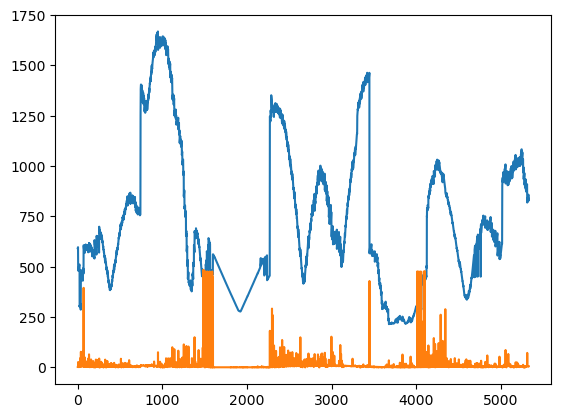

In [161]:
# plt.plot(lambda_lst)
plt.plot(cv_lst)
plt.plot(current_lst)

In [33]:
# ol_lst = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

In [170]:
ol_lst = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

In [50]:
ol_lst2

[2157,
 2160,
 2180,
 2181,
 2204,
 2205,
 2231,
 2232,
 4683,
 4684,
 4685,
 4703,
 4704,
 4725,
 4726,
 4761,
 4762,
 4773]

In [ ]:
[2157, 2160, 2181, 2205, 2232, 2262, 4684, 4685, 4704, 4726, 4761, 4773]

In [178]:
ol_lst

[2156,
 2157,
 2158,
 2159,
 2160,
 2161,
 2162,
 2163,
 2164,
 2165,
 2166,
 2167,
 2168,
 2169,
 2170,
 2171,
 2172,
 2173,
 2174,
 2175,
 2176,
 2177,
 2178,
 2179,
 2180,
 2181,
 2182,
 2183,
 2184,
 2185,
 2186,
 2187,
 2188,
 2189,
 2190,
 2191,
 2192,
 2193,
 2194,
 2195,
 2196,
 2197,
 2198,
 2199,
 2200,
 2201,
 2202,
 2203,
 2204,
 2205,
 2206,
 2207,
 2208,
 2209,
 2210,
 2211,
 2212,
 2213,
 2214,
 2215,
 2216,
 2217,
 2218,
 2219,
 2220,
 2221,
 2222,
 2223,
 2224,
 2225,
 2226,
 2227,
 2228,
 2229,
 2230,
 2231,
 2232,
 2233,
 2234,
 2235,
 2236,
 2237,
 2238,
 2239,
 2240,
 2241,
 2242,
 2243,
 2244,
 2245,
 2246,
 2247,
 2248,
 2249,
 2250,
 2251,
 2252,
 2253,
 2254,
 2255,
 2256,
 2257,
 2258,
 2259,
 2260,
 2261,
 2262,
 2263,
 2264,
 2265,
 2266,
 2267,
 2268,
 2269,
 2270,
 2271,
 2272,
 2273,
 2274,
 2275,
 2276,
 2277,
 2278,
 2279,
 2280,
 2281,
 2282,
 2283,
 2284,
 2285,
 2286,
 2287,
 2288,
 2289,
 2290,
 2291,
 2292,
 2293,
 2294,
 2295,
 2296,
 2297,
 2298,

In [171]:
ol_lst

[2156, 2160, 2180, 2204, 2231, 2261, 4683, 4684, 4703, 4725, 4761, 4773]

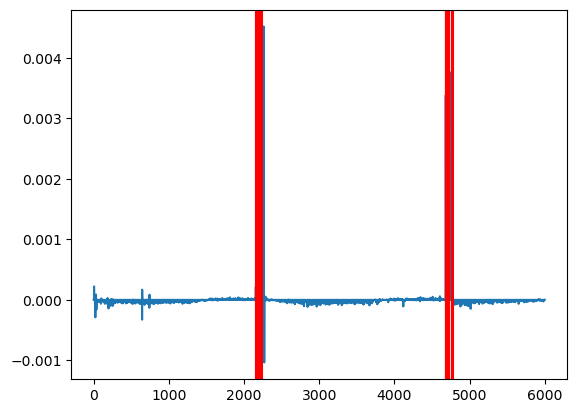

In [51]:
plt.plot(df_2)
for point in ol_lst2:
    plt.axvline(point, color='r')

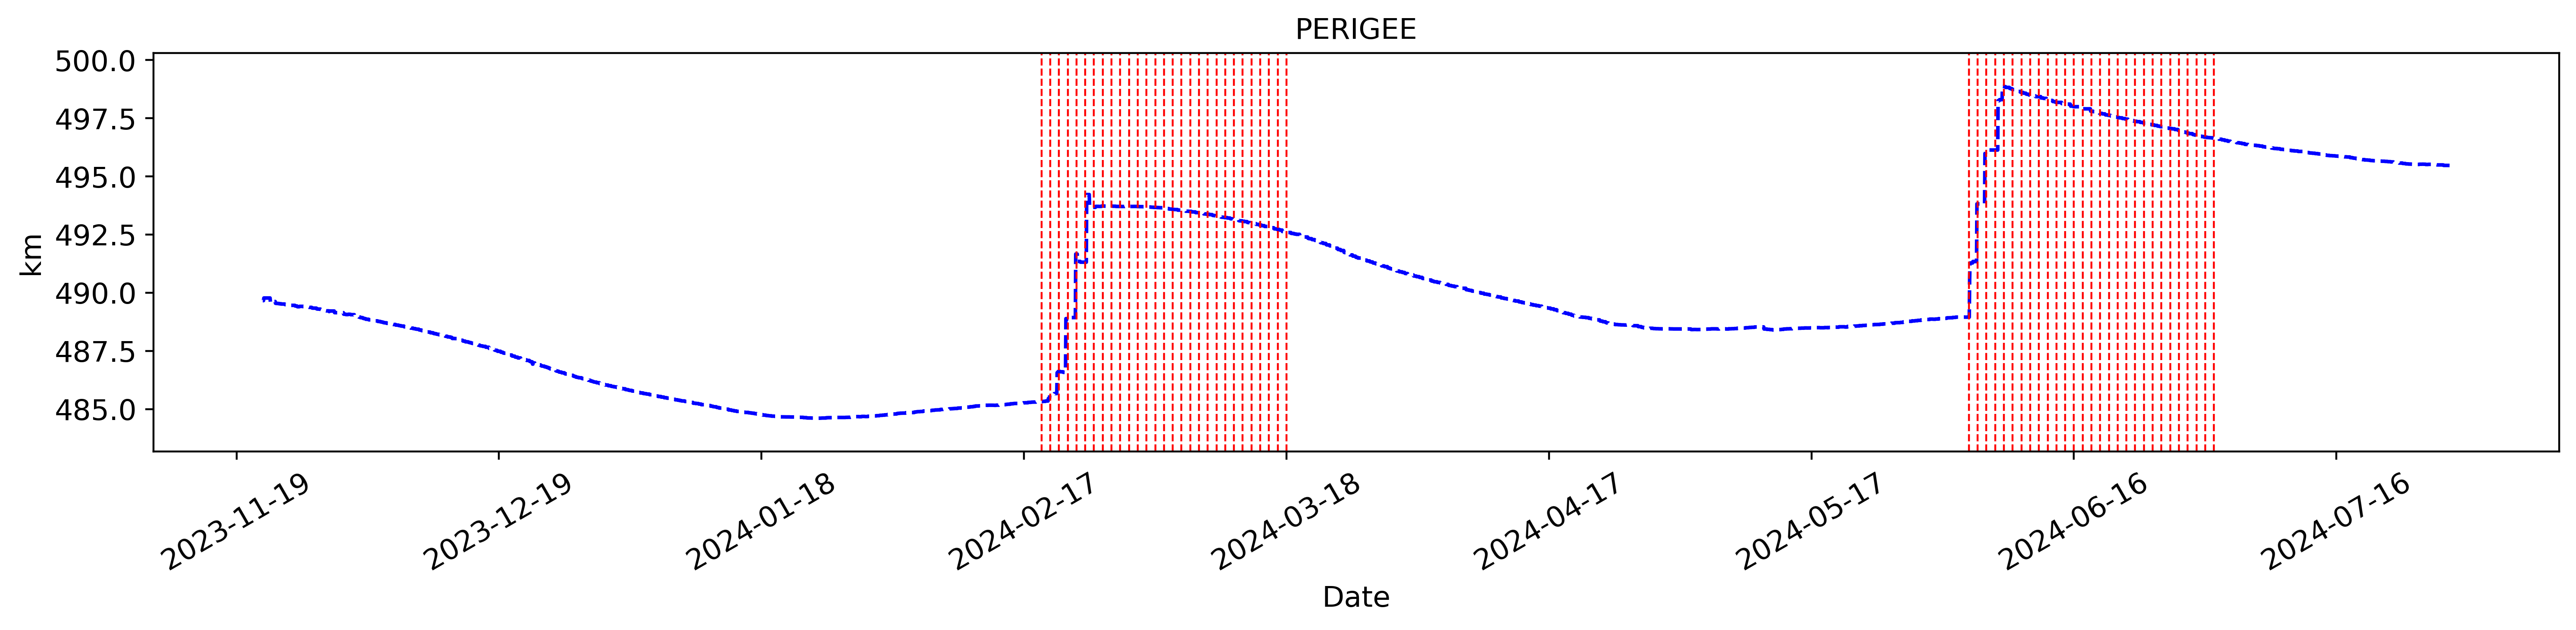

In [179]:
draw_graph(df_1, name.upper(), 'km',
           pd.DataFrame(df_1.iloc[ol_lst].index.date).drop_duplicates().values.tolist(), 'blue')

In [98]:
ol_lst

[2156, 2159, 2180, 2204, 2231, 2261, 4683, 4684, 4703, 4725, 4760, 4772]

In [99]:
ol_lst2 = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

In [100]:
ol_lst2

[2157, 2160, 2181, 2205, 2232, 2262, 4684, 4685, 4704, 4726, 4761, 4773]

In [108]:
ol_lst

[2156,
 2159,
 2179,
 2180,
 2203,
 2204,
 2230,
 2231,
 4682,
 4683,
 4684,
 4702,
 4703,
 4724,
 4725,
 4760,
 4761,
 4772]

In [109]:
ol_lst2 = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

In [172]:
ol_lst

[2156, 2160, 2180, 2204, 2231, 2261, 4683, 4684, 4703, 4725, 4761, 4773]

In [136]:
ol_lst = [2157, 2160, 2181, 2205, 2232, 2262, 4684, 4685, 4704, 4726, 4761, 4773]

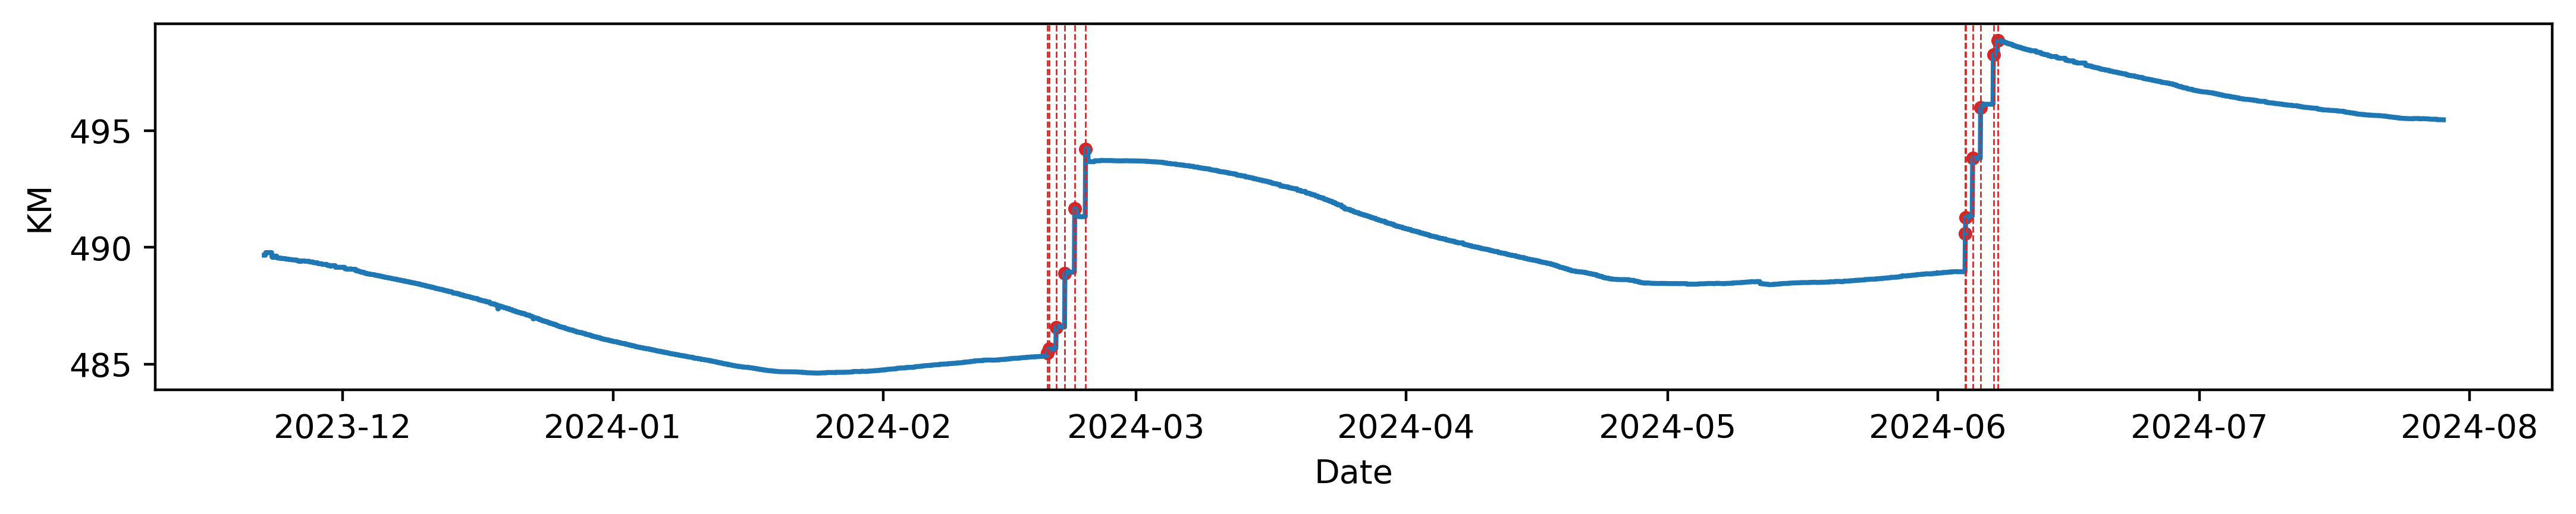

In [174]:
# ol_lst = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

plt.figure(figsize=(13, 2), dpi=400)
plt.plot(hour_df[col_name], color='tab:blue')

for point in ol_lst:
    plt.axvline(hour_df.index[point], color='tab:red', linewidth=0.5, linestyle='--')
    plt.scatter(hour_df.index[point], hour_df[col_name].iloc[point], color='tab:red', s=10)

plt.xlabel('Date')
plt.ylabel('KM')  # y축 레이블과 단위
plt.show()

In [138]:
me = [2157, 2160, 2180, 2181, 2204, 2205, 2231, 2232, 4683, 4684, 4685, 4703, 4704, 4725, 4726, 4761, 4762, 4773]

In [140]:
hour_df.index[me]

DatetimeIndex(['2024-02-19 21:15:00', '2024-02-20 00:15:00',
               '2024-02-20 20:15:00', '2024-02-20 21:15:00',
               '2024-02-21 20:15:00', '2024-02-21 21:15:00',
               '2024-02-22 23:15:00', '2024-02-23 00:15:00',
               '2024-06-04 03:15:00', '2024-06-04 04:15:00',
               '2024-06-04 05:15:00', '2024-06-04 23:15:00',
               '2024-06-05 00:15:00', '2024-06-05 21:15:00',
               '2024-06-05 22:15:00', '2024-06-07 09:15:00',
               '2024-06-07 10:15:00', '2024-06-07 21:15:00'],
              dtype='datetime64[ns]', freq=None)

In [155]:
hour_df['perigee'].iloc[me]

2024-02-19 21:15:00    485.460087
2024-02-20 00:15:00    485.638684
2024-02-20 20:15:00    486.566468
2024-02-20 21:15:00    486.566468
2024-02-21 20:15:00    488.889861
2024-02-21 21:15:00    488.889861
2024-02-22 23:15:00    491.665007
2024-02-23 00:15:00    491.665007
2024-06-04 03:15:00    490.600209
2024-06-04 04:15:00    491.282670
2024-06-04 05:15:00    491.282670
2024-06-04 23:15:00    493.820863
2024-06-05 00:15:00    493.820863
2024-06-05 21:15:00    495.984204
2024-06-05 22:15:00    495.984204
2024-06-07 09:15:00    498.257469
2024-06-07 10:15:00    498.257469
2024-06-07 21:15:00    498.878082
Name: perigee, dtype: float64

In [156]:
hour_df['perigee'].iloc[ol_lst]

2024-02-19 21:15:00    485.460087
2024-02-20 00:15:00    485.638684
2024-02-20 21:15:00    486.566468
2024-02-21 21:15:00    488.889861
2024-02-23 00:15:00    491.665007
2024-02-24 06:15:00    494.223067
2024-06-04 04:15:00    491.282670
2024-06-04 05:15:00    491.282670
2024-06-05 00:15:00    493.820863
2024-06-05 22:15:00    495.984204
2024-06-07 09:15:00    498.257469
2024-06-07 21:15:00    498.878082
Name: perigee, dtype: float64

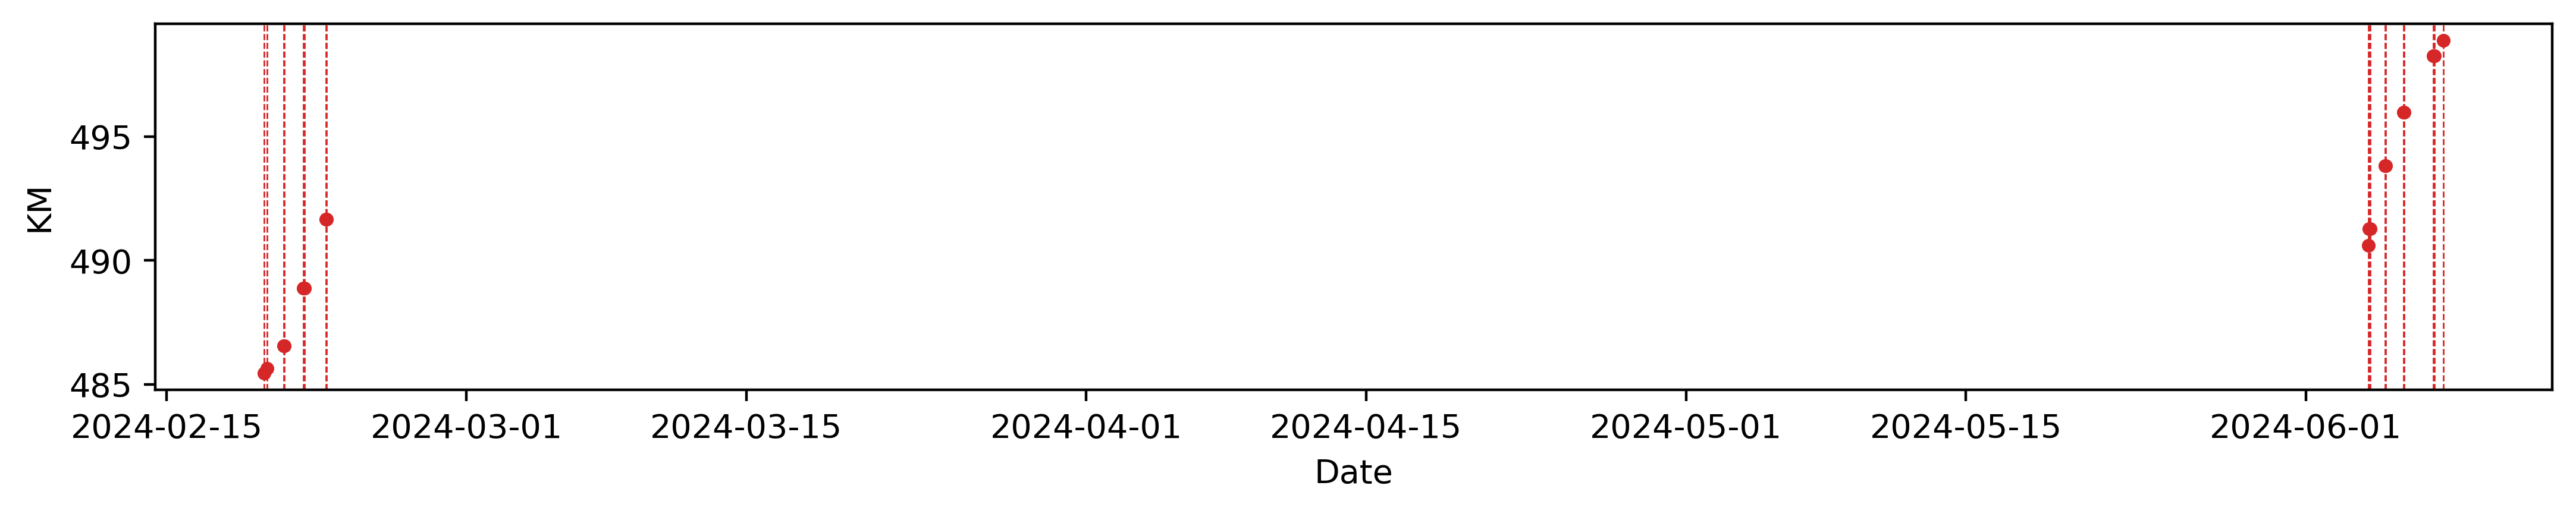

In [148]:
# ol_lst = list(np.where((np.array(current_lst) > np.array(cv_lst)))[0] + window_size)

plt.figure(figsize=(13, 2), dpi=400)
# plt.plot(hour_df[col_name], color='tab:blue')

for point in me:
    plt.axvline(hour_df.index[point], color='tab:red', linewidth=0.5, linestyle='--')
    plt.scatter(hour_df.index[point], hour_df[col_name].iloc[point], color='tab:red', s=10)

plt.xlabel('Date')
plt.ylabel('KM')  # y축 레이블과 단위
plt.show()

In [455]:
from scipy.stats import rankdata, chi2
from scipy.stats import kruskal


def offline_KWtest(array, ol_lst, N):
    not_ol_lst = []
    for i in ol_lst:
        if i < N or i + N > len(array):
            continue
        data = array[i - N:i + N]
        unique_values, counts = np.unique(data, return_counts=True)

        average_ranks = rankdata(data, method='average')
        X1 = average_ranks[:N].sum() ** 2
        X2 = average_ranks[N:].sum() ** 2
        KW = (12 / (len(data) * (len(data) + 1))) * (X1 / N + X2 / N) - 3 * (len(data) + 1)
        ties_correction = 1 - (1 / ((len(data)) ** 3 - 2 * N)) * np.sum(counts ** 3 - counts)

        if ties_correction == 0:
            continue

        KW_star = KW / ties_correction

        alpha = 0.5
        p_value = 1 - chi2.cdf(KW_star, 1)
        if p_value >= alpha:
            not_ol_lst.append(i)

    return not_ol_lst



In [458]:
KW_ol_lst = [ol for ol in ol_lst if ol not in offline_KWtest(df_3, ol_lst, 5)]

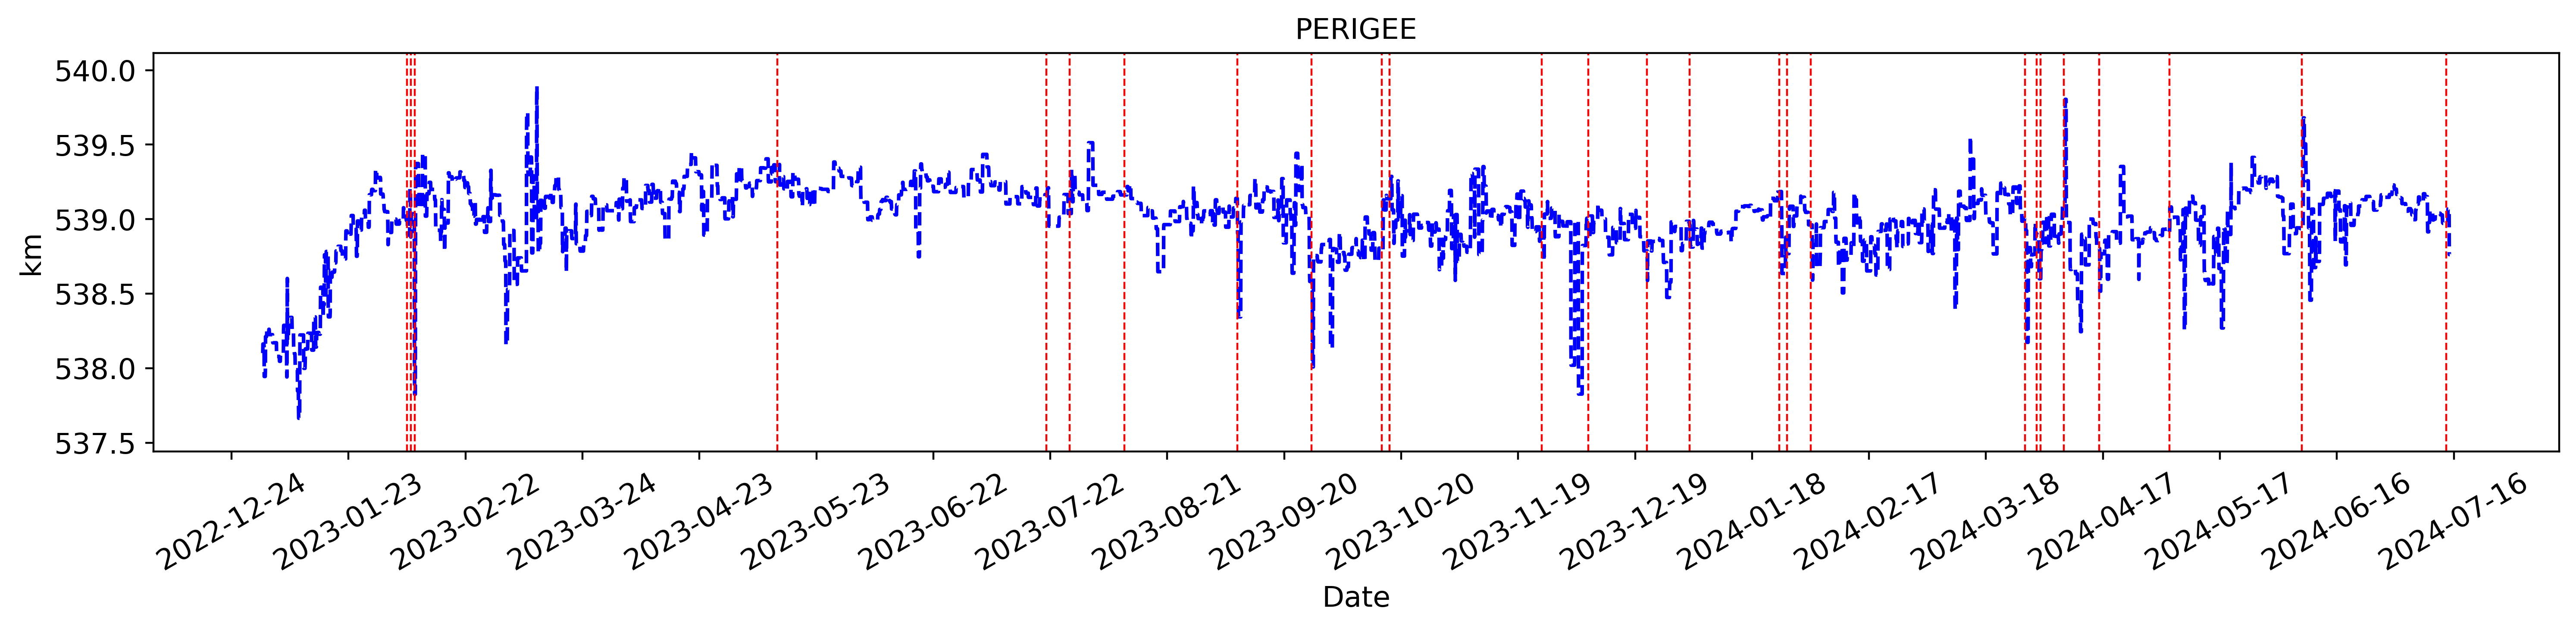

In [459]:
draw_graph(df_1, name.upper(), 'km',
           pd.DataFrame(df_1.iloc[KW_ol_lst].index.date).drop_duplicates().values.tolist(),
           'blue')

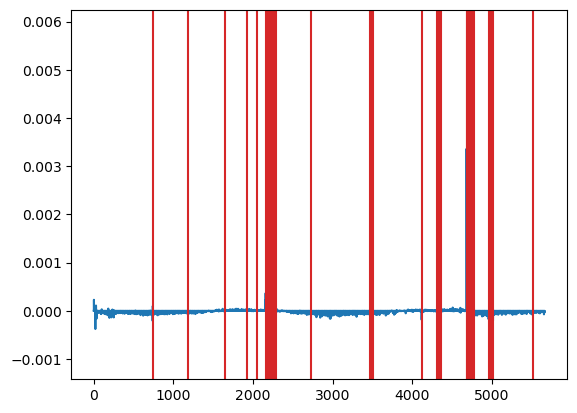

In [151]:
plt.plot(df_2)
for point in KW_ol_lst:
    plt.axvline(point, color='tab:red')